In [1]:
from node_attributes import classify_operator, match_constant

def node_features(G):
    """
    Extract features in each node:
    7 operator features + 2 operand features.
    """
    features = np.zeros((number_of_nodes(G), 7 + 2))
    for (i, (node, attributes)) in enumerate(G.nodes(data=True)):
        instructions = attributes['Ins']
        for (addr, inst) in instructions:
            if len(inst) == 0:
                break
            """
            Format of assembly code: "operator operand, operand, ..., operand"
            """
            operator_class = classify_operator(inst[0])
            features[i, operator_class] += 1
            if len(inst) == 1:
                continue
                
            for part in inst[1].split(','):
                comment_idx = part.find(';')
                operand = part if comment_idx == -1 else part[:comment_idx]
                numeric_cnts, string_cnts = match_constant(operand)
                features[i, -2] += numeric_cnts
                features[i, -1] += string_cnts
                
    return features

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import glob
import pickle as pkl
import numpy as np
import scipy as sp
import pandas as pd
from collections import Counter
from networkx import number_of_nodes, adjacency_matrix

class_dirnames = glob.glob('*')

graph_sizes = {'Benign': [], 'Bagle': [], 'Bifrose': []}
total = 0
output_dir = 'AllACFGs/'
CFG_labels = ['Benign', 'Bagle', 'Bifrose']

"""Path name format: class/graph_id/pkl_name"""
for class_dirname in class_dirnames:
    if class_dirname not in CFG_labels:
        continue
    
    print("Processing %s CFGs" % class_dirname)
    data_dirnames = glob.glob(class_dirname + '/*')
    for data_dirname in data_dirnames:
        pkl_filenames = glob.glob(data_dirname + '/*')
        if len(pkl_filenames) == 0:
            print('[Warning] %s is empty' % data_dirname)
        else:
            # Assume only 1 file under data dir
            total += 1
            G = pkl.load(open(pkl_filenames[0], 'rb'))
            graph_sizes[class_dirname].append(number_of_nodes(G))
            # features = node_features(G)
            # np.savetxt(output_dir + graph_id + '.features.txt', features, fmt="%d")
            # np.savetxt(output_dir + graph_id + '.label.txt', np.array([label]), fmt="%s")
            # np.savetxt(output_dir + graph_id + '.adjacent.txt', adjacency_matrix(G).todense(), fmt="%d")
            # sp.sparse.save_npz(output_dir + graph_id + '.adjacent', adjacency_matrix(G))


print("%d CFGs" % total)
graph_size_pd = pd.DataFrame.from_dict(graph_sizes, orient='index').T
graph_size_pd.to_csv(output_dir + 'graph_sizes.csv', index=False, header=True)

Processing Bagle CFGs
Processing Bifrose CFGs
[Warning] Bifrose/68577f95d878fb0d3cb1ccb311bcd375 is empty
Processing Benign CFGs
[Warning] Benign/ef11db385af16b633efbd524907baa58 is empty
1689 CFGs


In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv(output_dir + 'graph_sizes.csv', header=0)
max_num_nodes = data.max()
label_cnts = {key: data[key].count() for key in CFG_labels}
print(label_cnts)

{'Benign': 518, 'Bagle': 152, 'Bifrose': 1019}


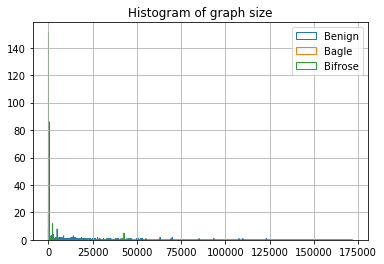

In [4]:
for column in data:
    df = data[column].dropna()
    max_num_nodes = df.max()
    plt.hist(df, bins=np.arange(0, max_num_nodes, 1),
             histtype='step', label=column)

plt.legend()
plt.title('Histogram of graph size')
plt.grid(True)
plt.show()